In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv("csv/82000278_Toamnei_PM10_2021.csv")

In [3]:
dataframe.head()

,time,latitude,longitude,altitude,pm10
0,1609452017,45.651464,25.615426,100,22
1,1609452077,45.651464,25.615426,100,14
2,1609452137,45.651464,25.615426,100,11
3,1609452197,45.651464,25.615426,100,11
4,1609452257,45.651464,25.615426,100,13


In [4]:
dataframe_size = len(dataframe.index)
dataframe_size

471844

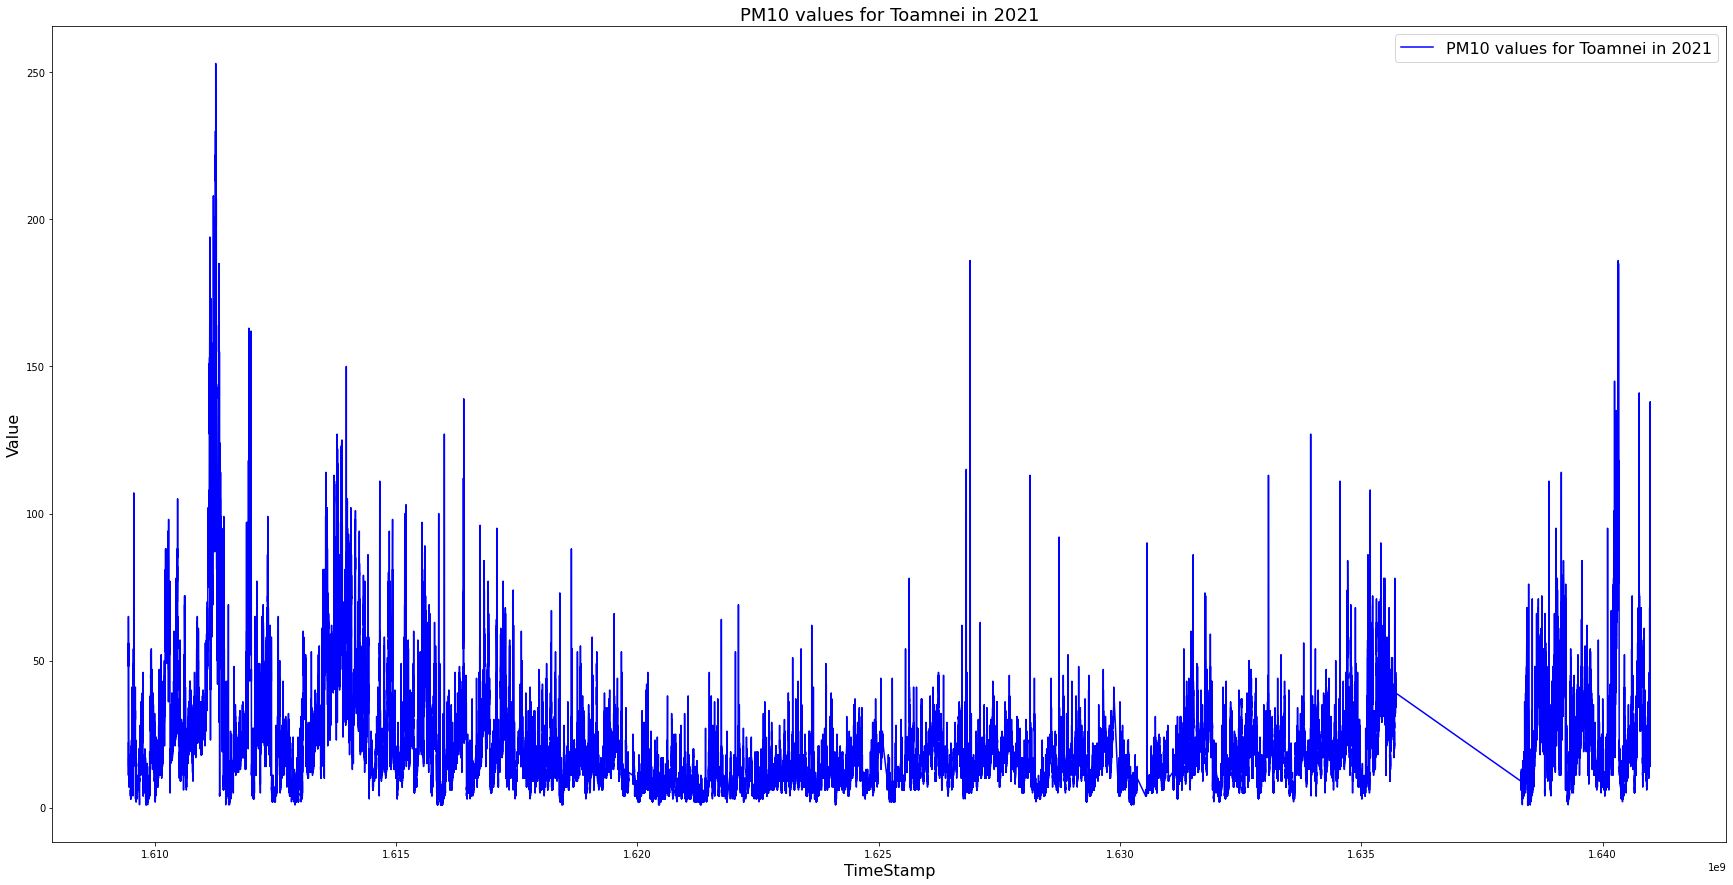

In [5]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(dataframe.get('time'), dataframe.get('pm10'), label="PM10 values for Toamnei in 2021", color = "blue")
# plt.scatter(dataframe.get('_source.TimeStamp'), dataframe.get('_source.Value'), color = "red")
plt.xlabel("TimeStamp", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("PM10 values for Toamnei in 2021", fontsize=18)
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/PM10_Toamnei_2021.jpg', bbox_inches = 'tight')
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [7]:
X = dataframe[["time"]].values
y = dataframe[["pm10"]].values

In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

In [10]:
print("Slope: ", float(regressor.coef_))
print("Intercept: ", float(regressor.intercept_))

Slope:  -2.633993490208539e-07
Intercept:  447.57821478501506


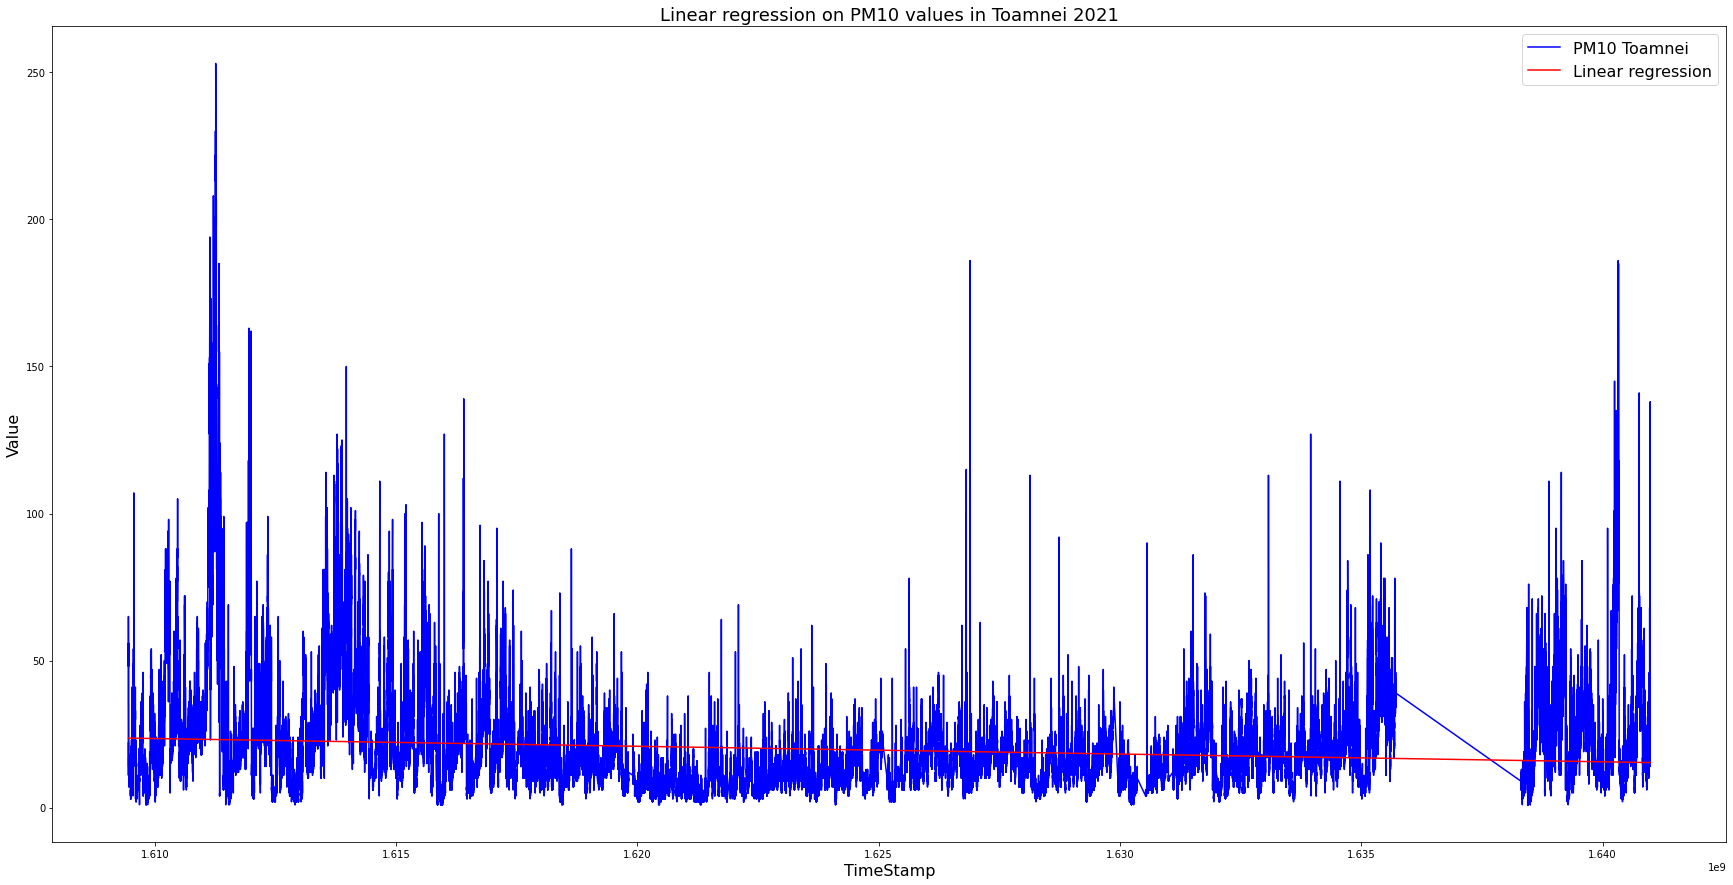

In [11]:
plt.figure(figsize=(30,15))
plt.plot(X,y, color = 'blue', label="PM10 Toamnei")
plt.plot(X, regressor.predict(X), color = 'red', label="Linear regression")
plt.title('Linear regression on PM10 values in Toamnei 2021', fontsize=18)
plt.xlabel('TimeStamp', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/PM10_Toamnei_2021_Linear.jpg', bbox_inches = 'tight')
plt.show()

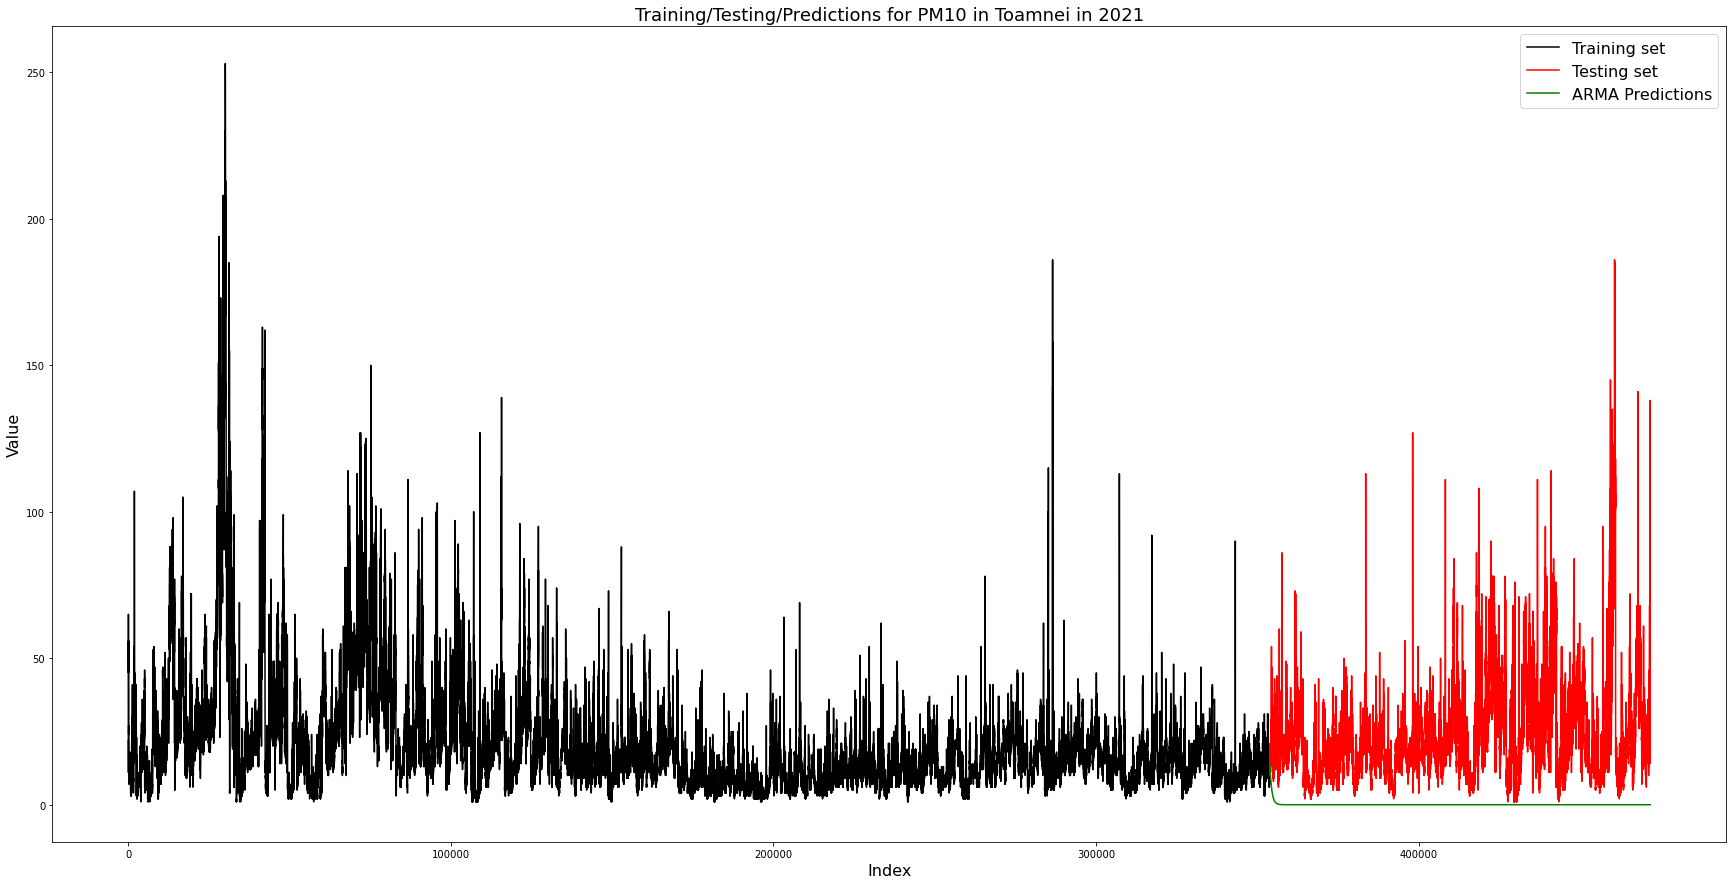

RMSE:  26.865906116332738


In [12]:
train = dataframe[dataframe.index < dataframe_size*(3/4)]
test = dataframe[dataframe.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
y = train['pm10']

ARMAmodel = SARIMAX(y, order=(1,0,1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('pm10'), color = "black", label = "Training set")
plt.plot(test.index, test.get('pm10'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions for PM10 in Toamnei in 2021", fontsize=18)
plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/PM10_Toamnei_2021_ARMA.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["pm10"].values, y_pred_df["Predictions"]))
print("RMSE: ", arma_rmse)

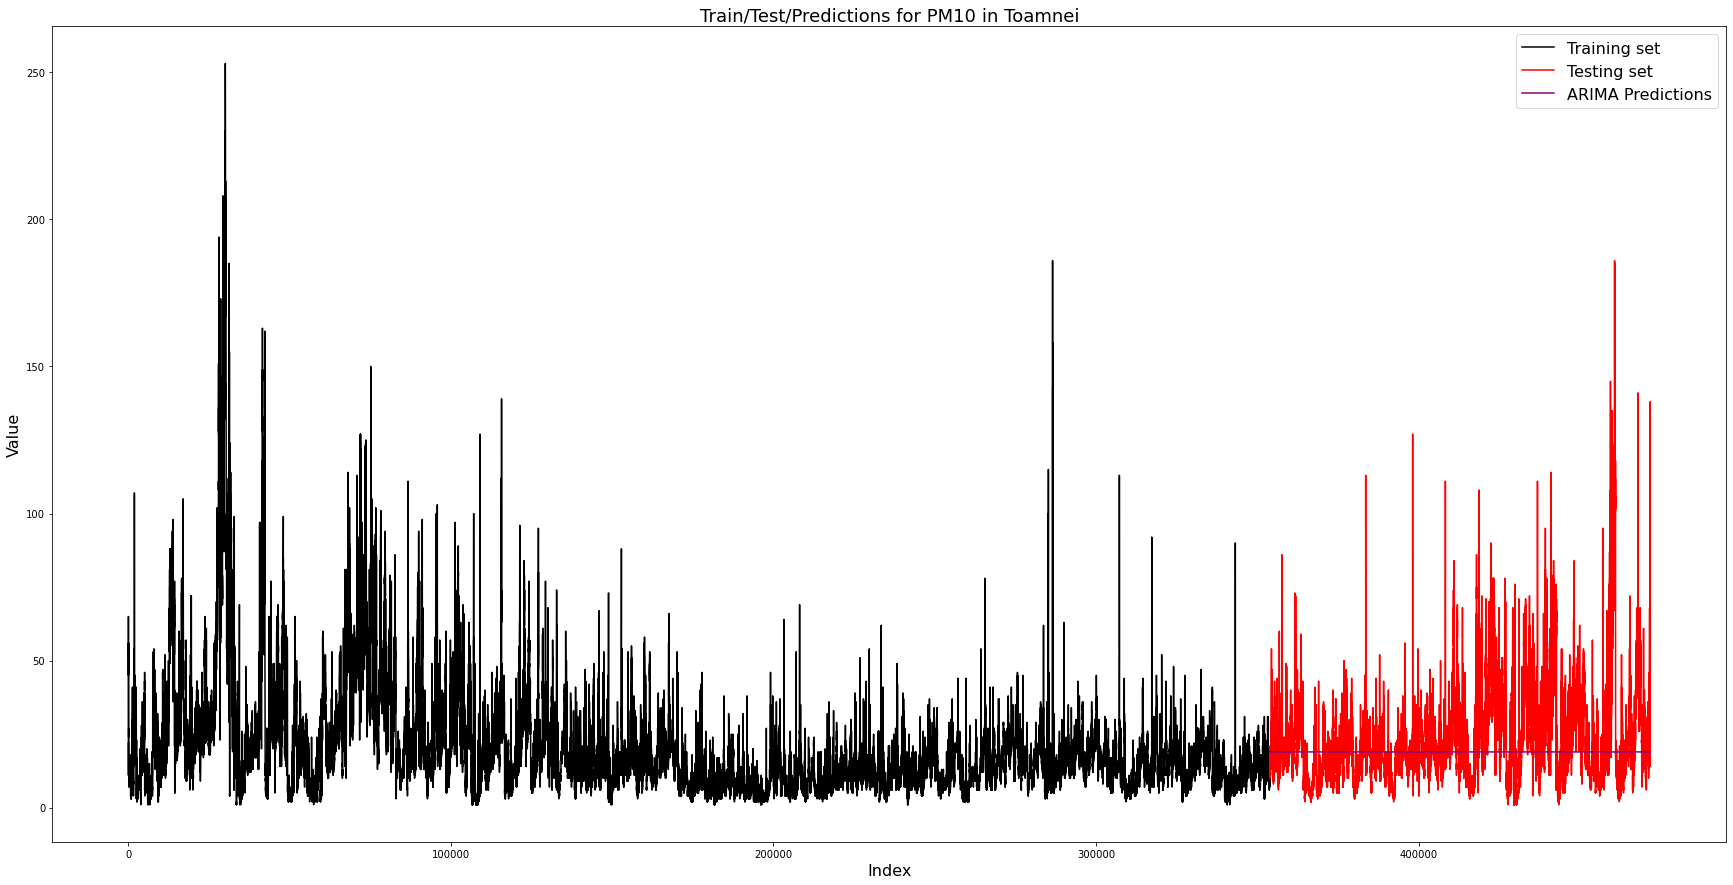

RMSE:  15.4260529023172


In [13]:
train = dataframe[dataframe.index < dataframe_size*(3/4)]
test = dataframe[dataframe.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['pm10']

ARMAmodel = ARIMA(y, order=(0,0,0))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('pm10'), color = "black", label = "Training set")
plt.plot(test.index, test.get('pm10'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Train/Test/Predictions for PM10 in Toamnei", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions')
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/PM10_Toamnei_2021_ARIMA.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse1 = np.sqrt(mean_squared_error(test["pm10"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse1)

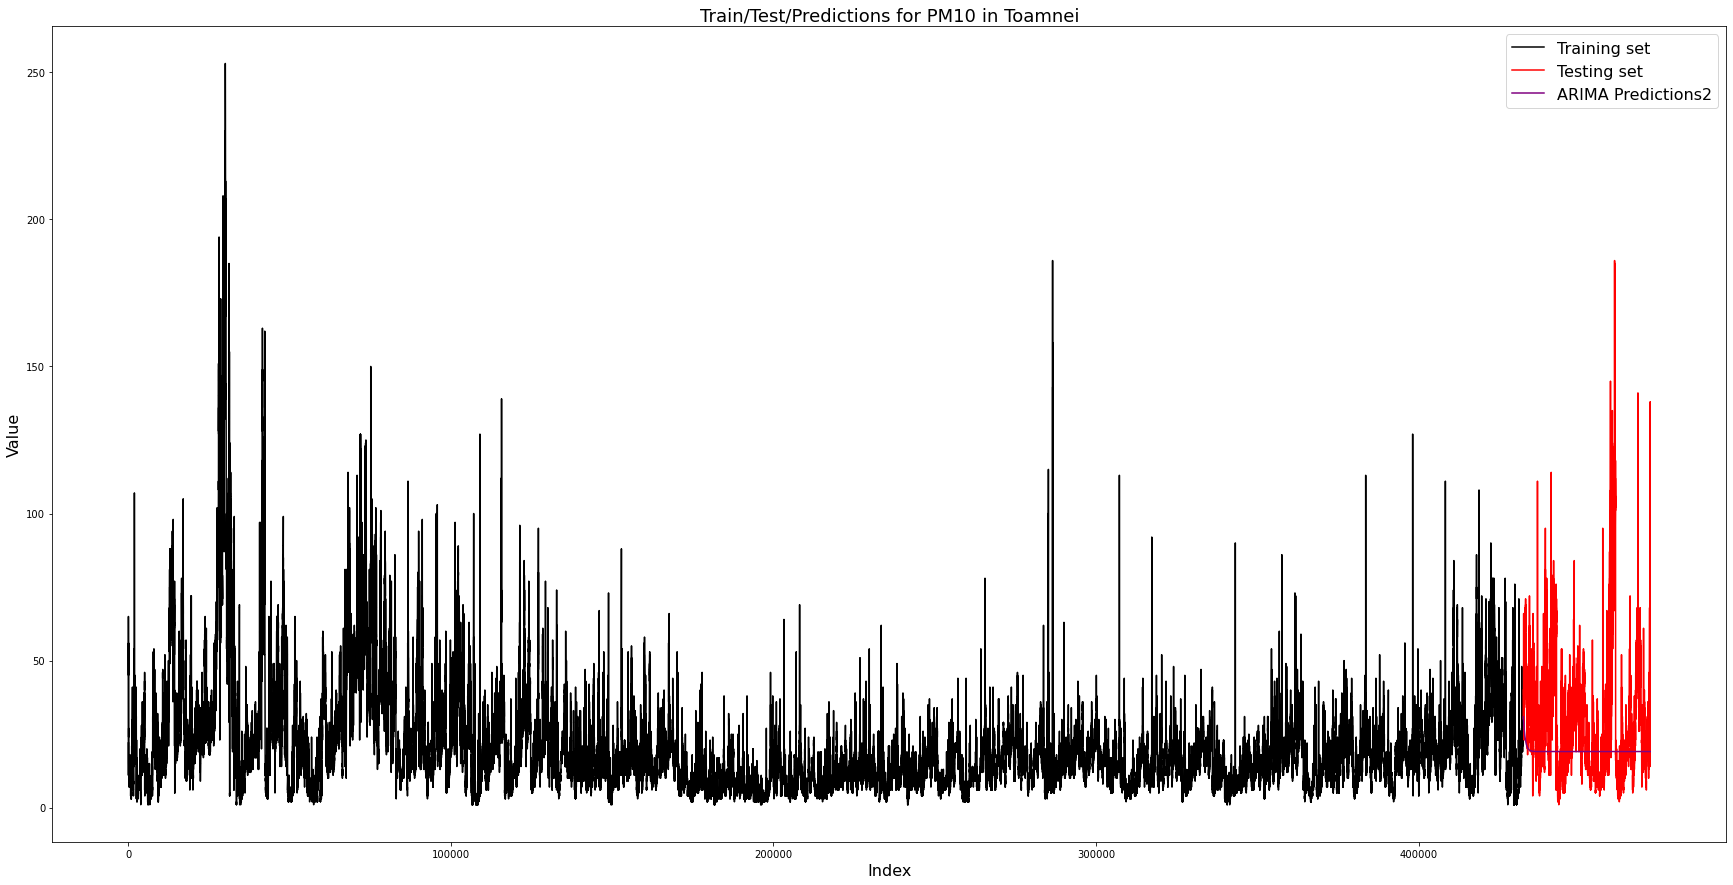

RMSE:  20.792572652069595


In [15]:
train = dataframe[dataframe.index < dataframe_size*(11/12)]
test = dataframe[dataframe.index >= dataframe_size*(11/12)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['pm10']

ARMAmodel = ARIMA(y, order=(2,0,2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('pm10'), color = "black", label = "Training set")
plt.plot(test.index, test.get('pm10'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Train/Test/Predictions for PM10 in Toamnei", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions2')
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/PM10_Toamnei_2021_ARIMA_v2.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse2 = np.sqrt(mean_squared_error(test["pm10"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse2)